# ItDS Assignment 6

This homework assignment is about lecture 6.

The homework is automatically checked. There are some strict guidelines, which are explained below, including some other information.

- The first code cell contains a function - `student()` - in which you have to fill in your name, student number and e-mail. Please do so __correctly__, since these will be used to store and mail your results.

- All exercises are defined as a function (`def`), of which we will check whether your output of the function corresponds with ours. This means that __we will only check the answer__ (output). So, always check whether your function _returns_ (careful: this is not the same as print) an answer as specified in the exercise!
	- __Do not change the names__ of the given functions, these are specifically named this way for checking the homework. (e.g. if you are to answer exercise 1 which is a function coded: `def exercise1():`, then do not change the name of the function `exercise1()`)
	- __Do not define another new function with the same name__. Even if it is in other cells. We will not be able to find the right version.
	- Do not write additional code in the cell where the function is defined, so only include code within the function that is necessary for the answer. 
    - After the cell with the function (`def`) a code cell is added where an example of an answer is given to show the format of your output. It also contains a test of your function. You can adjust this to whatever you want (even delete it if you want).
	
- Feel free to __add new cells to test snippets of code or for other purposes__.

- There are no hard deadlines, but 15/100 points are awarded for submitting your work before the due date, which you can find on blackboard. It will need to pass at least one test at that time in order to earn those 15 points. __You will be able to resubmit your work at any time after that (until 1 January) and earn the remaining 85/100 points__.

About your homework results: An _exercise_ is considered to be correct if all its subquestions are answered correctly, however an _exercise_ sometimes undergoes multiple tests (based on different inputs). The e-mail with results specifies per _exercise_ which tests you have passed and which you have failed. You will get a score proportional to the number of tested passed.


For any questions about abovementioned guidelines and information or other homework related problems, please e-mail us or ask directly during the workgroup!

- Nicolas Carmona: nicolascarmonao@gmail.com
- Laura Zwep: l.b.zwep@lacdr.leidenuniv.nl

## Scikit-learn: KNN
The exercises for this assignment will revisit the nearest neighbour classification, but this time you will not have to implement it all by hand! We will use the scikit-learn package.

This classification will be done on simulated data. The code cell below contains the function to simulate $n$ observations of $X$ with two features and outcome $y$ with 3 different categories (0, 1 and 2). Beware that this uses random numbers and running the function will give a different outcome every time. This data is mainly generated to give you toy data. The data that we use to check you assignment can look different.

In [5]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

#generate
# in: number of observations generated: n
# out: two-dimensional numpy array of features/variables (X) of n by 2 and
#      a one dimensional numpy array with the n corresponding outcome classes (0, 1 or 2)

def generate(n):
    X = []
    Y = []
    for i in range(n):
        category = np.random.randint(0,3)
        if category < 2:
            x1 = np.sqrt(np.random.random())
            x2 = np.random.random()
            if category == 1:
                x1 = 1 - x1
        else:
            x1, x2 = [0.5, 0.5] + np.random.randn(2)*0.3
        X.append((x1, x2))
        Y.append(category)
    return np.array(X), np.array(Y)

Now we can generate the data by using this function:

In [6]:
n = 4000
(X, y) = generate(n)

We use `matplotlib.pyplot` to show what the data looks like. Since $X$ has two variables, this can be plotted in a scatterplot. The colours represent the different categories: red (0), blue (1) and yellow (2).

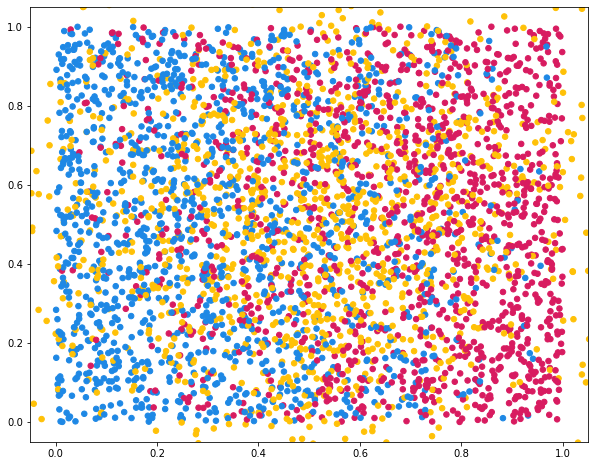

In [7]:
# plot the data
cmap = matplotlib.colors.ListedColormap(['#D81B60', '#1E88E5', '#FFC107'])
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], 30, c=y, cmap=cmap)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.show()

The plot shows large overlap in the different categories. Using the simple nearest neighbours algorithm as in HW4 might yield many misclassified points, so we will use k-nearest neighbours classification (kNN) instead.

A short desciption of kNN: given the training data $(X,y)$ and a new point $x'$, find the $k$ points in $X$ closest to $x'$, and predict the category that is most common among that set.

To implement the nearest neighbour approach using scikit-learn, feel free to check the lecture notes. Also, when importing modules, you can __do so inside your function__, to prevent errors when we check your work.

### Exercise 1: kNN predictions

Use scikit-learn to write a function fitting a 3-nearest neighbour model, which can predict categories for new data. The first two inputs are the data, separated into a feature numpy array ($X$) and a categories numpy array ($y$). You can use the generated example above to test your algorithm. The third input is a numpy array containing new data points (with the same dimension as $X$), for which you should predict the category. Example inputs and output are shown two cells below. Keep in mind that the number of features, classes and new data points that we will test might differ from what you test below, meaning that your function should work for any combination of numbers of features, classes and new data points!

Note: To check if you implemented the nearest neighbour model correctly, you can check whether your predictions seem reasonable. For example, you can try to predict the points $(0,0)\ (0,1)\ (1,0)\ (1,1)$.


In [8]:
# nearest_neighbour_3
# in: generated data, containing the features (X): feats
#     generated data, containing the categories (y): category
#     new values of the features to classify based on given data: new_feats
# out: numpy array containing predicted categories for the new feature values


def nearest_neighbour_3(feats, category, new_feats):
    from sklearn.neighbors import KNeighborsClassifier
    K = KNeighborsClassifier(n_neighbors=3)
    K.fit(feats, category)
    return K.predict(new_feats)

In [9]:
# Example of a correctly formatted function output (not the actual output)
import numpy as np
print(np.array([0, 0, 0, 0]))

# Your output
testpoints = np.array(([0, 0], [0, 1], [1, 0], [1, 1]))
print(nearest_neighbour_3(X, y, testpoints))

[0 0 0 0]
[1 1 0 0]


### Exercise 2: kNN questions

Answer the next questions in the cell below. Strictly adhere to the format as given in the example (all strings)!

1. How much information about the training data is stored in the kNN model? Choose from the answers { `'nothing'`, `'something, but not everything'`, `'everything'` }.

- kNN has a hyperparameter $k$ (number of neighbours), which we need to decide beforehand. We can make models on all integers $k \in [1, n]$. If $n = 1000$, what $k$ will give the best accuracy on the __training data__? Choose from the next answers: `'1'`, `'5'`, `'50'`, `'100'`, `'250'`, `'500'`, `'1000'`

- In general: will your accuracy on the __test data__ perform better on $k =$ `'1'` or on $k = $ `'more'` neighbours?

- Suppose you transform the training data by __multiplying it by 2__ ($ X \cdot 2$) and you test it against new data (which is transformed in the same way), is the resulting classification affected, compared to the classification of the untransformed training and test data? (answer `'yes'` or `'no'`)

- Suppose you transform the training data by __taking the data to power 2__ ($X^2$) and you test it against new data (which is transformed in the same way), is the resulting classification affected, compared to the classification of the untransformed training and test data? (answer `'yes'` or `'no'`)

In [10]:
# answers
# in: Nothing
# out: tuple with 5 answers to the questions


def answers():
    a1 = "everything"
    a2 = "1"  # answer as a string!
    a3 = "more"  # answer as a string!
    a4 = "no"
    a5 = "yes"

    return(a1, a2, a3, a4, a5)

In [11]:
# Example of a correctly formatted function output (might not be the actual output)
print(("nothing", '1', "1", "yes", "yes"))

# Your output
print(answers())

('nothing', '1', '1', 'yes', 'yes')
('everything', '1', 'more', 'no', 'yes')


### Exercise 3: Prediction error

After fitting a kNN model (or any model), which we will call $f$, we want to measure the prediction error  of in terms of the average 01-loss (${L}(\mathbf{\hat y},\mathbf{y})$) of the predictions on the training data, so $\mathbf{\hat y}=f(\mathbf{X})$. The 01-loss is defined as: 

$$I(\mathbf{\hat y} \neq \mathbf{y}) $$

where $I$ is the indicator function. 

Write a function to calculate the prediction error of a fitted kNN model. As input you get a fitted nearest neighbour model, some new data and its category labels, both as numpy arrays. Output the prediction error as a float. Round the error to three decimals.

In [12]:
# calculate_PE
# in: fitted nearest neighbour model: fitmod
#     generated data, containing the categories (y): new_category
#     generated data, containing the new features (X): new_feats
# out: prediction error of the fitted model on the given new data


def calculate_PE(fitmod, new_feats, new_category):
    #     return round(1 - fitmod.score(new_feats, new_category), 3)
    return round(sum(fitmod.predict(new_feats) != new_category) / len(new_feats), 3)

In [13]:
# Example of a correctly formatted function output (not the actual output)
from sklearn.neighbors import KNeighborsClassifier
print(0.167)

# Your output
testpoints, testlabels = generate(100)
K = KNeighborsClassifier(n_neighbors=3)
testmod = K.fit(X, y)

print(calculate_PE(testmod, testpoints, testlabels))

0.167
0.52


### Exercise 4: optimal $k$

The value of $k$ has to be decided on in kNN. We want to find an optimal $k$, which we will define as $k$ that yields the lowest error on a given test set. Given some training data and test data, evaluate different values of $k$ (you can use the `calculate_PE` function). The input consist of the data and a tuple with different values of $k$.

Make sure that your function does not give an error if one of the $k$'s is larger than the training data. If this happens, the $k$ should be skipped.

_Extra:_ To get more insight in the algorithm you can take a look at how the optimal $k$ changes for differing sample sizes ($n$) in the training set.

In [14]:
# optimal_k
# in:  some training data, containing features (X): train_X
#      catergories of given training data (y): train_y
#      some test data, containing features (X): test_X
#      catergories of given training data (y): test_y
#      tuple of k's to evaluate: k_set
# out: An integer indicating the optimal k


def optimal_k(train_X, train_y, test_X, test_y, k_set):
    from sklearn.neighbors import KNeighborsClassifier
    best_score = 0
    best_k = 0
    for k in k_set:
        if k <= len(train_X):
            K = KNeighborsClassifier(n_neighbors=k)
            K.fit(train_X, train_y)
            score = K.score(test_X, test_y)
            if score > best_score:
                best_score, best_k = score, k
    return best_k

In [15]:
# Example of a correctly formatted function output (not the actual output)
print(5)

# Your output
X, y = generate(n)  # make training data (try for differing values of n)
testpoints, testlabels = generate(1000)  # make test data
test_k = (1, 2, 5, 10, 100, 10000)
print(optimal_k(X, y, testpoints, testlabels, test_k))

5
10


### Exercise 5: Misclassification

This exercise is similar to the previous one. The inputs are of the same format, but now you should output a numpy array containing the number of misclassifications for each category. Assume we only have three categories ($0$,$1$ and $2$) as in the data generated in the beginning of the exercise. Test this for the same values for a predefined set of $k$: $\{1,2,5,10,20,50,100,200,500,1000\}$ (in this order!). The output should be a numpy array with three values per row, each for a different category in the order: $0$,$1$ and $2$. Every row contains these misclassifications for a different $k$. So the output array will be 3 by 10.

In this exercise we will not test your function in the case of $k > n$, so the input training set will always have a $n \geq 1000$.

In [18]:
# misclassification
# in:  some training data, containing features (X): train_X
#      catergories of given training data (y): train_y
#      some test data, containing features (X): test_X
#      catergories of given training data (y): test_y
# out: numpy array with number of misclassifications per category over different k

def misclassifications(train_X, train_y, test_X, test_y):
    from sklearn.neighbors import KNeighborsClassifier
    k_set = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
    misses = [[0, 0, 0] for _ in range(len(k_set))]
    for j, k in enumerate(k_set):
        if k <= len(train_X):
            K = KNeighborsClassifier(n_neighbors=k)
            K.fit(train_X, train_y)
            hat_y = K.predict(test_X)
            for i, y in enumerate(test_y):
                misses[j][y] += y != hat_y[i]
                # Tried [j][y] last time
    return np.array(misses)

In [19]:
# Example of a correctly formatted function output (not the actual output)
print(np.array([[62,  93, 103], [35,  90, 132], [46,  83, 117],
                [48,  76, 114], [41,  82, 124], [41,  89, 123],
                [43,  85, 127], [41,  72, 133], [34,  57, 157], [0, 199, 167]]))

# Your output
# make training data (you can try this for different values of n, with n >= max(k))
np.random.seed(1)
X, y = generate(n)
X2, y2 = generate(500)  # make test data
test_k = (1, 2, 5, 10, 100, 10000)
print(len(X2))
print(misclassifications(X, y, X2, y2))
print(g_misclassifications(X, y, X2, y2))

[[ 62  93 103]
 [ 35  90 132]
 [ 46  83 117]
 [ 48  76 114]
 [ 41  82 124]
 [ 41  89 123]
 [ 43  85 127]
 [ 41  72 133]
 [ 34  57 157]
 [  0 199 167]]
500
[[ 79  86  93]
 [ 44  82 113]
 [ 58  80 101]
 [ 59  79 104]
 [ 52  71 102]
 [ 47  72 108]
 [ 50  73 108]
 [ 48  74 109]
 [ 45  71 115]
 [ 43  67 125]]
[[ 79  86  93]
 [ 44  82 113]
 [ 58  80 101]
 [ 59  79 104]
 [ 52  71 102]
 [ 47  72 108]
 [ 50  73 108]
 [ 48  74 109]
 [ 45  71 115]
 [ 43  67 125]]
